# Symbolic Regression with constants (via Evolutionary Strategy)

In this second tutorial we consider some input data that are

In [5]:
# Some necessary imports.
import dcgpy
import pygmo as pg
# Sympy is nice to have for basic symbolic manipulation.
from sympy import init_printing
from sympy.parsing.sympy_parser import *
init_printing()
# Fundamental for plotting.
from matplotlib import pyplot as plt
%matplotlib inline

#### 1 - The data

In [6]:
# We load our data from some available ones shipped with dcgpy.
# In this particular case we use the problem chwirut2 from 
# (https://www.itl.nist.gov/div898/strd/nls/data/chwirut2.shtml)
X, Y = dcgpy.generate_kirby2()


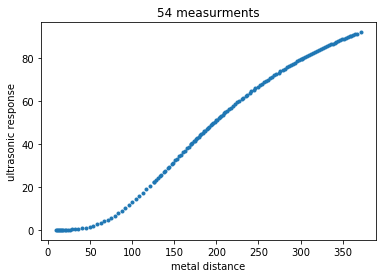

In [7]:
# And we plot them as to visualize the problem.
_ = plt.plot(X, Y, '.')
_ = plt.title('54 measurments')
_ = plt.xlabel('metal distance')
_ = plt.ylabel('ultrasonic response')




#### 2 - The symbolic regression problem

In [8]:
# We define our kernel set, that is the mathematical operators we will
# want our final model to possibly contain. What to choose in here is left
# to the competence and knowledge of the user. A list of kernels shipped with dcgpy 
# can be found on the online docs. The user can also define its own kernels (see the corresponding tutorial).
ss = dcgpy.kernel_set_double(["sum", "diff", "mul", "pdiv"])

In [57]:
# We instantiate the symbolic regression optimization problem (note: many important options are here not
# specified and thus set to their default values)
udp = dcgpy.symbolic_regression(points = X, labels = Y, kernels=ss(), n_eph = 5,levels_back=10, rows = 5, cols=20)
print(udp)

	Data dimension (points): 1
	Data dimension (labels): 1
	Data size: 151
	Kernels: [sum, diff, mul, pdiv]



#### 3 - The search algorithm

In [58]:
# We instantiate here the evolutionary strategy we want to use to search for models.
uda  = dcgpy.es4cgp(gen = 10000, mut_n = 2)
local_uda = dcgpy.gd4cgp(max_iter = 20, lr = 0.1, lr_min = 1e-12)

#### 4 - The search

In [66]:
prob = pg.problem(udp)
algo = pg.algorithm(uda)
local_algo = pg.algorithm(local_uda)
# Note that the screen output will happen on the terminal, not on your Jupyter notebook.
# It can be recovered afterwards from the log.
algo.set_verbosity(10)
local_algo.set_verbosity(1)
pop = pg.population(prob, 4)

In [67]:
pop = algo.evolve(pop)

In [68]:
pop = local_algo.evolve(pop)

#### 5 - Inspecting the solution

In [74]:
# Lets have a look to the symbolic representation of our model (using sympy)
a = parse_expr(udp.prettier(pop.champion_x))[0]

In [82]:
a.subs("c_2", 0.1)
a.free_symbols

In [54]:
# And lets see what our model actually predicts on the inputs
Y_pred = udp.predict(X, pop.champion_x)

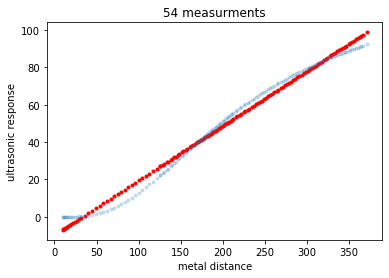

In [55]:
# Lets comapre to the data
_ = plt.plot(X, Y_pred, 'r.')
_ = plt.plot(X, Y, '.', alpha=0.2)
_ = plt.title('54 measurments')
_ = plt.xlabel('metal distance')
_ = plt.ylabel('ultrasonic response')


#### 6 - Recovering the log


In [146]:
pop.best_idx()


In [12]:
# Here we get the log of the latest call to the evolve
log = algo.extract(dcgpy.es4cgp).get_log()
gen = [it[0] for it in log]
loss = [it[2] for it in log]

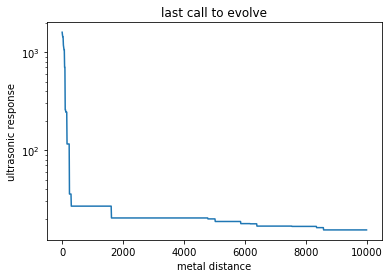

In [19]:
# And here we plot, for example, the generations against the best loss
_ = plt.semilogy(gen, loss)
_ = plt.title('last call to evolve')
_ = plt.xlabel('metal distance')
_ = plt.ylabel('ultrasonic response')